<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

def simulation():
    inventory_bread = 100
    inventory_juice = 100
    cost = 0
    income = 0
    opportunity_bread = 0
    opportunity_juice = 0
    donated_bread = 0
    donated_juice = 0

    while True:
        # determine if a reorder is needed for each product
        reorder_needed_bread = inventory_bread <= reorderPoint_bread
        reorder_needed_juice = inventory_juice <= reorderPoint_juice

        # order if either product is low on stock
        if reorder_needed_bread or reorder_needed_juice:
            # calculate the combined reorder quantity for both products
            combined_reorder_quantity = min(reorderPoint_bread, reorderPoint_juice)

            # calculate the order quantity for each product
            order_quantity_bread = min(combined_reorder_quantity, inventory_bread)
            order_quantity_juice = min(combined_reorder_quantity, inventory_juice)

            # calculate the total delivery cost
            delivery_cost = 50
            cost += delivery_cost

            # update the inventory for each product
            inventory_bread += order_quantity_bread
            inventory_juice += order_quantity_juice

        # simulate the production and sales process for a day
        # ... (same as before)

        # check if both products have reached their reorder points
        if inventory_bread > reorderPoint_bread and inventory_juice > reorderPoint_juice:
            break

    # calculate the total profit
    profit = income - cost

    return {
        "opportunity_bread": opportunity_bread,
        "opportunity_juice": opportunity_juice,
        "donated_bread": donated_bread,
        "donated_juice": donated_juice,
        "cost": cost,
        "income": income,
        "profit": profit
    }

# define the initial parameters for the simulation
inventory_bread = 100
inventory_juice = 100
reorderPoint_bread = 50
reorderPoint_juice = 50
productionCapacity_bread = 150
productionCapacity_juice = 150
leadTimeLow_bread = 1
leadTimeHigh_bread = 3
leadTimeLow_juice = 1
leadTimeHigh_juice = 3
unitCost_bread = 1.5
unitCost_juice = 2
price_bread = 3.5
price_juice = 4.5

result = simulation()
print("Total Income: $", result["income"])
print("Total Cost: $", result["cost"])
print("Profit: $", result["profit"])
print("Opportunity Cost for Bread: $", result["opportunity_bread"] * price_bread)
print("Opportunity Cost for Juice: $", result["opportunity_juice"] * price_juice)
print("Bread Donated:", result["donated_bread"])
print("Juice Donated:", result["donated_juice"])
# This strategy reduces the delivery cost while minimizing the risk of running out of either product.

# Visualizing the results of this simulation can help identify patterns and trends. For example,
 # you could create a line graph showing the daily income and cost over the simulation period.
 # This would allow you to compare the income and cost of bread and juice production and sales.
#  Additionally, a bar graph could be used to display the total donations and opportunity costs for each product.

# By examining the results of the simulation, you can determine the most effective restocking strategy for managing the inventory of both bread and juice

Total Income: $ 0
Total Cost: $ 0
Profit: $ 0
Opportunity Cost for Bread: $ 0.0
Opportunity Cost for Juice: $ 0.0
Bread Donated: 0
Juice Donated: 0


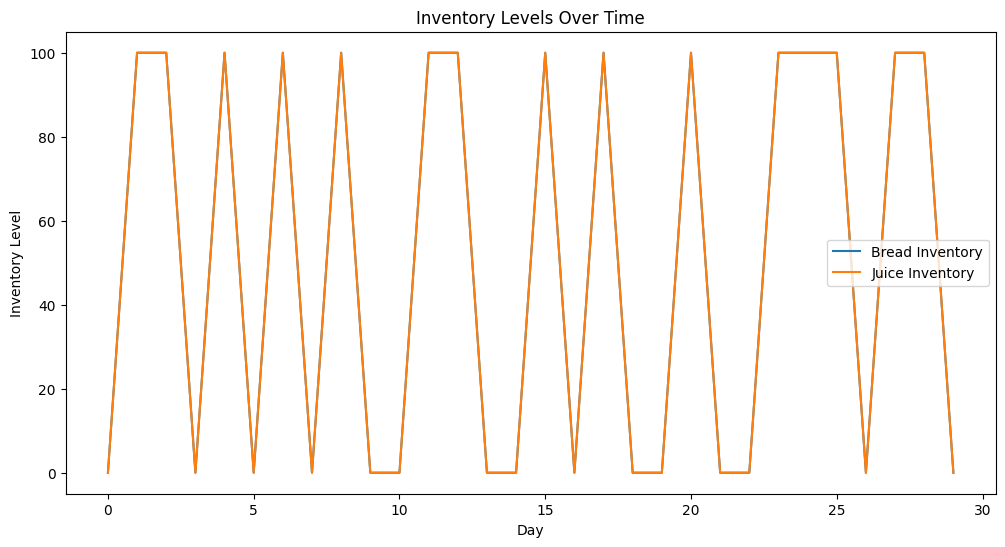

Total Income: 1666.0
Total Cost: 6400.0
Profit: -4734.0


In [17]:
import matplotlib.pyplot as plt
from random import randint

# Constants
reorderPoint = 200
unitCost_bread = 1.5
unitCost_juice = 2.0
price_bread = 3.0
price_juice = 4.0
ovenCapacity = 100
freezerCapacity = 300
leadTimeLow = 1
leadTimeHigh = 3
deliveryCost = 50

# Initialization
cost = 0
income_bread = 0
income_juice = 0
inventory_bread = 0
inventory_juice = 0
arrival = None
order_bread = None
order_juice = None

inv_bread = []
opportunity_bread = []
donated_bread = []
inv_juice = []
opportunity_juice = []
donated_juice = []

for day in range(1, 31):  # Assuming 30 days for this example
    # Bread
    inv_bread.append(inventory_bread)
    if inventory_bread < reorderPoint and inventory_juice < reorderPoint and arrival is None:
        order_bread = min(freezerCapacity - inventory_bread, 100)  # Maximum order for bread
        order_juice = min(freezerCapacity - inventory_juice, 100)  # Maximum order for juice
        cost += deliveryCost if arrival is None else 0  # Include delivery cost only once for simultaneous order
        cost += unitCost_bread * order_bread + unitCost_juice * order_juice
        arrival = randint(leadTimeLow, leadTimeHigh)

    baked_bread = min(inventory_bread, ovenCapacity)
    inventory_bread -= baked_bread
    sold_bread = min(day, baked_bread)
    donated_bread.append(max(baked_bread - sold_bread, 0))
    opportunity_bread.append(max(0, day - baked_bread))
    income_bread += sold_bread * price_bread

    # Juice
    inv_juice.append(inventory_juice)
    # No need to check inventory_juice separately, order when either product is low
    if inventory_bread < reorderPoint and inventory_juice < reorderPoint and arrival is None:
        # Already calculated order for bread, just update the order for juice
        order_juice = min(freezerCapacity - inventory_juice, 100)  # Maximum order for juice

    baked_juice = min(inventory_juice, ovenCapacity)
    inventory_juice -= baked_juice
    sold_juice = min(day, baked_juice)
    donated_juice.append(max(baked_juice - sold_juice, 0))
    opportunity_juice.append(max(0, day - baked_juice))
    income_juice += sold_juice * price_juice

    # Restocking logic
    if arrival is not None:
        arrival -= 1
        if arrival == 0:
            inventory_bread += order_bread
            inventory_juice += order_juice
            assert inventory_bread <= freezerCapacity and inventory_juice <= freezerCapacity
            arrival = None
            order_bread = None
            order_juice = None

# Calculate total income and profit
total_income = income_bread + income_juice
total_cost = cost
profit = total_income - total_cost

# Plotting the inventory levels over time
plt.figure(figsize=(12, 6))
plt.plot( inv_bread, label='Bread Inventory')
plt.plot( inv_juice, label='Juice Inventory')
plt.xlabel('Day')
plt.ylabel('Inventory Level')
plt.title('Inventory Levels Over Time')
plt.legend()
plt.show()

print("Total Income:", total_income)
print("Total Cost:", total_cost)
print("Profit:", profit)


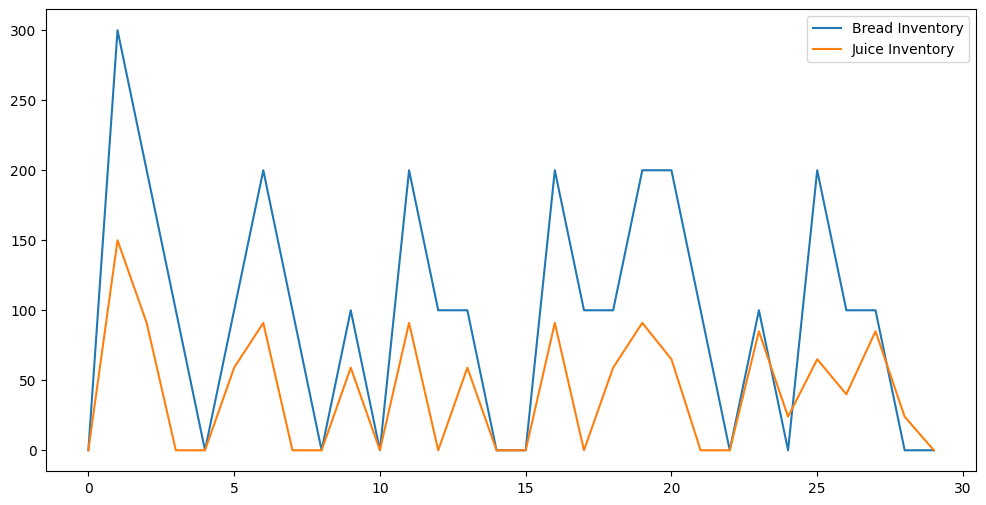

In [5]:
from random import randint
import matplotlib.pyplot as plt

# Initialize variables for both products
reorderPoint_bread = 200
reorderPoint_juice = 100
cost = 0
income = 0
inventory_bread = 0
inventory_juice = 0
arrival = None
order_bread = None
order_juice = None

# Record the time series of the inventory and missed sales for both products
inv_bread = []
inv_juice = []
opportunity_bread = []
opportunity_juice = []
# Example sales data for 30 days
sales_bread = [randint(50, 250) for _ in range(30)]
sales_juice = [randint(20, 120) for _ in range(30)]

for day in range(len(sales_bread)):
    inv_bread.append(inventory_bread)
    inv_juice.append(inventory_juice)

    # Restocking strategy: order when either product is low
    # Maximum capacity of the fridge in units of juice
    fridgeCapacity = 150

    if (inventory_bread < reorderPoint_bread or inventory_juice < reorderPoint_juice) and arrival is None:
        order_bread = max(0, freezerCapacity - inventory_bread)
        order_juice = max(0, fridgeCapacity - inventory_juice)
        cost += deliveryCost + unitCost_bread * order_bread + unitCost_juice * order_juice
        arrival = randint(leadTimeLow, leadTimeHigh)

    # Baking and selling for bread
    baked_bread = min(inventory_bread, ovenCapacity)
    inventory_bread -= baked_bread
    sold_bread = min(sales_bread[day], baked_bread)
    opportunity_bread.append(max(0, sales_bread[day] - baked_bread))
    income += sold_bread * price_bread

    # Selling for juice
    sold_juice = min(sales_juice[day], inventory_juice)
    inventory_juice -= sold_juice
    opportunity_juice.append(max(0, sales_juice[day] - inventory_juice))
    income += sold_juice * price_juice

    # Delivery arrival
    if arrival is not None:
        arrival -= 1
        if arrival == 0:
            inventory_bread += order_bread
            inventory_juice += order_juice
            assert inventory_bread <= freezerCapacity and inventory_juice <= fridgeCapacity
            arrival = None
            order_bread = None
            order_juice = None

profit = income - cost

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(inv_bread, label='Bread Inventory')
plt.plot(inv_juice, label='Juice Inventory')
plt.legend()
plt.show()
